In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

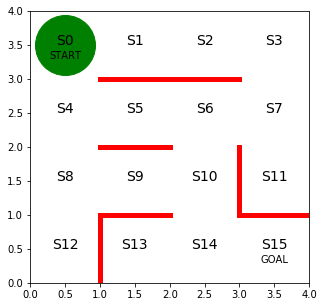

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')
plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')


# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

line, = ax.plot([0.5], [3.5], marker="o", color='g', markersize=60)

# 붉은 벽 그리기
plt.plot([1, 3], [3, 3], color='red', linewidth=5)
plt.plot([3, 3], [1, 2], color='red', linewidth=5)
plt.plot([1, 2], [2, 2], color='red', linewidth=5)
plt.plot([1, 2], [1, 1], color='red', linewidth=5)
plt.plot([3, 4], [1, 1], color='red', linewidth=5)
plt.plot([1, 1], [0, 1], color='red', linewidth=5)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~15, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, 1, np.nan, 1],  # s2
                    [np.nan, np.nan, 1, 1],  # s3
                    [1,  1,   1,   np.nan],  # s4
                    [np.nan, 1, np.nan, 1],  # s5
                    [np.nan, 1, 1, 1     ],  # s6
                    [1, np.nan, 1 , 1    ],  # s7
                    [1, 1, 1, np.nan     ],  # s8
                    [np.nan, 1, np.nan, 1],  # s9
                    [1, np.nan, 1, 1     ],  # s10
                    [1, np.nan, np.nan, np.nan],  # s11
                    [1, np.nan, np.nan, np.nan],  # s12
                    [np.nan, 1, np.nan, np.nan],  # s13
                    [1, 1, np.nan, 1],  # s14,               
                                        # s15는 목표지점이므로 정책이 없다
                    ])

In [4]:
# 정책 파라미터 theta를 행동정책 pi로 변환하는 함수


def simple_convert_into_pi_from_theta(theta):
    '''단순히 값의 비율을 계산'''

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [5]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수


def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [6]:
# 초기 정책 pi_0을 계산
#pi_simple = simple_convert_into_pi_from_theta(theta_0)
#print(pi_simple)

pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.33333333]]


In [7]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 4  # 위로 이동하면 상태값이 4 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 4  # 아래로 이동하면 상태값이 4 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [8]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다


def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 15:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [9]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [4, 2], [8, 2], [12, 0], [8, 2], [12, 0], [8, 1], [9, 1], [10, 3], [9, 1], [10, 2], [14, 1], [15, nan]]
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다


In [10]:
# theta를 개선하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [11]:
# 정책 수정
#new_theta = update_theta(theta_0, pi_0, s_a_history)
#pi = softmax_convert_into_pi_from_theta(new_theta)
#print(pi)

In [12]:
# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-3  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.01869731235770483
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.016106134789320714
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.02572994443355503
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.0141559352175753
목표 지점에 이르기까지 걸린 단계 수는 66단계입니다
0.009012342318958366
목표 지점에 이르기까지 걸린 단계 수는 252단계입니다
0.02490023834112076
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.019953709384583518
목표 지점에 이르기까지 걸린 단계 수는 36단계입니다
0.012929573831286512
목표 지점에 이르기까지 걸린 단계 수는 94단계입니다
0.00784814518913568
목표 지점에 이르기까지 걸린 단계 수는 184단계입니다
0.0087518194361626
목표 지점에 이르기까지 걸린 단계 수는 122단계입니다
0.012768431125474156
목표 지점에 이르기까지 걸린 단계 수는 118단계입니다
0.008586193167864298
목표 지점에 이르기까지 걸린 단계 수는 204단계입니다
0.010690448194330127
목표 지점에 이르기까지 걸린 단계 수는 108단계입니다
0.013453156888542539
목표 지점에 이르기까지 걸린 단계 수는 72단계입니다
0.010075586353735733
목표 지점에 이르기까지 걸린 단계 수는 138단계입니다
0.016832335656387865
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.013731335905494801
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.016920391605265372
목표 지점에 이르기까지 걸린 단계 수는 102단계입니다
0.00705216886585508
목표 지점에 이르기까지 걸린 단계 수는 178단계입니다
0.009694578323934833
목표 지점에 이르기

0.009561885328511655
목표 지점에 이르기까지 걸린 단계 수는 54단계입니다
0.010728772821225752
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.024794657370085738
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.01601811296217015
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.018509668309754868
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.012167143593902308
목표 지점에 이르기까지 걸린 단계 수는 112단계입니다
0.011836967275663524
목표 지점에 이르기까지 걸린 단계 수는 74단계입니다
0.024934448778970053
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.010724093753201214
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다
0.0069514013390051255
목표 지점에 이르기까지 걸린 단계 수는 280단계입니다
0.030971965406540236
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.007708631397771781
목표 지점에 이르기까지 걸린 단계 수는 130단계입니다
0.015609327404221607
목표 지점에 이르기까지 걸린 단계 수는 80단계입니다
0.03645720475070163
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.04740905249354044
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.014253750674018295
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.0218672666225716
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.015433665653180051
목표 지점에 이르기까지 걸린 단계 수는 72단계입니다
0.02204187331167179
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.01496351644268662
목표 지점에 이르기까지 

0.022314378389864414
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.022533158388312907
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.01782851642387215
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.011920096203429292
목표 지점에 이르기까지 걸린 단계 수는 106단계입니다
0.031750925059112894
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010991372520630732
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다
0.03372451135462323
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013132270986575045
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.026341112091270186
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.019039732439702806
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.01805095858858266
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.027879320555388
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.024046893207793768
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.018301082728319623
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.021251054564026123
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.016745243041113134
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.018472396506716754
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.02608141852950338
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014994599989951812
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.026595497193987738
목표 지점에 이르기까지 걸린 단

0.021009451828073178
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.01786080710452584
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.01703818936653692
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.016871049475223804
목표 지점에 이르기까지 걸린 단계 수는 56단계입니다
0.02494755147557559
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.014171346766920195
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.03718936134715775
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.03617979774190058
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02432437894137704
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.015223863789162212
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.0168068093756166
목표 지점에 이르기까지 걸린 단계 수는 50단계입니다
0.022272353689845897
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.015967763773613725
목표 지점에 이르기까지 걸린 단계 수는 48단계입니다
0.025120657117518708
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.031989691636541945
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02407230191930182
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.016108502601245134
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.026407261214523248
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.035671900733579176
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015691291547235614
목표 지점에 이르기까지 걸린 단계 수는

0.03060065955352048
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.027303480257637486
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.022278453646013913
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.018134360498735153
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.01556350926194583
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.022461345769454077
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.02935159275940233
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02246687135495526
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.0188500227464663
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.03403429530324545
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.026810466760125995
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.017955558918345688
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.027300378575282863
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01858796108784483
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.019674497817132736
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.014565001573257574
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.029373459177767958
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.019201518251420913
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.020464072366083053
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.01722614412748716
목표 지점에 이르기까지 걸린 단계 수는 

0.01789286270975665
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.017622656108698453
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.018918165685626903
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.023364208508474926
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01649377826353915
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.024920995612332214
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02199758675586383
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.021553272879789948
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.015001821603144089
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.02390352999920778
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.02423383925306799
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.020421346030631782
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.025278440886393277
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01335184647869278
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다
0.021494449355517697
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.019687889038023182
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.027776444127689426
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.01849773777323535
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019772391867797667
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.018399665240582813
목표 지점에 이르기까지 걸린 단계 수

0.019213928809806602
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.023447858489720516
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.028783239813897868
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01972370774350589
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016950479281122047
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01486750539908717
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016279648024593377
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.020238739816713064
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.020713849922739766
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.021656765070370954
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.022379443427386445
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.015040074163848241
목표 지점에 이르기까지 걸린 단계 수는 36단계입니다
0.03369259327926882
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.02007223015104441
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.016947500263003498
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01792666576195845
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.022113698478785138
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01910394414393829
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018074976890506092
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.018272561537818782
목표 지점에 이르기까지 걸린 단계 

0.020212991844304445
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016150340615179046
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013634724139012927
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.014609849372150693
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.020138025233875867
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018295697607414216
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.020417577791514138
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.01612036042499393
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.014478281851096508
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.021516454897169315
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.015116196509328536
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.015777452525114005
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.014998513450086723
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.017756425658434757
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.01690282603330792
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.022444045744542854
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.015100069138358083
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.013604929148256145
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.020458610264554755
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01801809486465064
목표 지점에 이르기까지 걸린 

0.02047560069584467
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01458922046278413
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.015775137296559966
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.02043626727464158
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017166437777292945
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015785552930034974
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014540948963525813
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017766146028299054
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018267376057283208
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016367858308337827
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.017634522173756564
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01781074818722532
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01670081088895338
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.014382571120661575
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019339887062398295
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.014313616693557948
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02019104885948554
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014045538463939161
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.022601102729037634
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.017385056167215904
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다

0.01988930423123078
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.016160331737434308
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013329251793231522
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.016082699035366133
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.029986006078014715
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0180277389832601
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014828635308028346
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01277367524839837
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.014532653745469457
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.021093842846619096
목표 지점에 이르기까지 걸린 단계 수는 32단계입니다
0.012799389417971235
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.020429767271128108
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015368367993300686
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.016717623646756594
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.016076814479042675
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014186744884194927
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015878877827435425
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015772964833113245
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013267494783951422
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011680534806276045
목표 지점에 이르기까지 걸린 단계 수는 8단

0.01465149565310795
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013987799805784601
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012595976056689058
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.013951211915098391
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014181265845687525
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.02922026192570698
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013861655336335911
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013776513570399579
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013026354125669777
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010740629702085128
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013623846799332998
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.019889064872966433
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.012950185943703944
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013839916722523736
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.021224242994545214
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.017543186879228137
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.019013329560408514
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012784831716805771
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013751923224738075
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012240212163563122
목표 지점에 이르기까지 걸린 단계 수는 8단계입

0.010399680361531355
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012554781452255415
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.018078439317220384
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.014257489933102455
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015116492351385173
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01257399693587307
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.022870810677184474
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012465508920905366
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014186630884718124
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.014276861806241534
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014193265960233334
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012534561444451121
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012715720421809754
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01817701183013789
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.014515628311383123
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014133972032261868
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011982887250128922
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.01255649233927423
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012473671056970094
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012390667488747023
목표 지점에 이르기까지 걸린 단계 수는 6단계

0.026174692773289508
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.013476838340803585
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011973560244949992
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.024008214020261556
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014126031151839878
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.017991240326932834
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02017968909422528
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.023964192977107994
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.013057312620878232
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01198580059735778
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012232788224244846
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015214346641114936
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.01311855096238787
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01799698516198968
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01218024570275917
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012102476854670703
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016976566338262465
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011581341300310091
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01889088241985879
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.013401417786197495
목표 지점에 이르기까지 걸린 단계 수는 14단계입

0.011186107817785347
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.012004383790273507
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012579390227474875
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01079527989537124
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01744993633243147
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012579011933754061
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01982429032399203
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.012559039804230829
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011946488507926345
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011809088678377294
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.012548108873176991
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011595737462762871
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013868991731660556
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.014575451103609034
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011423486203830442
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.013364055591937131
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.012713966997874894
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012093961097003461
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011524915936170936
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01985083069877043
목표 지점에 이르기까지 걸린 단계 수는 16단계

0.011880527376920483
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011589777990389113
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011848267916066899
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0115627662687941
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01126342117366027
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011655362719794546
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013130422559997725
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.016781196600357255
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.011949117815357735
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010947734712926434
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.015414441102117954
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011430601833140472
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011350276899191165
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016804219373119066
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010819068138946238
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01207822958201031
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011256401521070172
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012044247472997219
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011979870171770358
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0112917756116682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01

0.01291560711689551
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011531904907115094
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016615807157375546
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011475616567478579
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.011540952724559995
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011429783045840337
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01136170656654692
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007538059340495291
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011613898154936811
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011318073048806568
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016940859886995112
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.011301827877037457
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012332141281883487
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.022734884856029043
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011773209726587928
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.011616793403152643
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011345672526258538
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011589539445317092
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015586488334729268
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.02833221706263548
목표 지점에 이르기까지 걸린 단계 수는 18단계

0.009718375949838293
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011470318322517006
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011835777676174969
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009768564216217322
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012149174293587826
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009764060313361807
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01002166182919878
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016834200845401825
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00971135746299346
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007575556882823867
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009586332212248895
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013415915429073659
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.016842444103474345
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008918827134791071
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011495365177074952
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0075798312571234705
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010051465692913493
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012556369267846645
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.012169252435888768
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007587453075404288
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다

0.00900445323736639
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011783515584625478
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006489164350183426
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009577680291827637
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.008680046016407157
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01128074767080903
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009674209769841024
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011432887745515184
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00901964405902373
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008375881700468192
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.013016500115538787
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.013323741876507107
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.00873320515257759
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0063603478407751185
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011765678379383599
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010929542877888096
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.008691821627034836
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011316076348834744
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008682483457542717
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008612945326201757
목표 지점에 이르기까지 걸린 단계 수는 6단계입니

0.00495443425762538
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011662084557845651
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012474602269888866
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011342177200941602
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.014790721681061561
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.011853820360453314
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011813411920325818
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007708243336639428
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011787338004489858
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011744171892193313
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011699027889044165
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01309607089589104
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.007937258590149595
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011082448495241256
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007938445935698084
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007872759777906947
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008233114728716844
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012977340777349241
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008136353264965916
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012909532399671218
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다


0.01173525808768145
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007858516315994157
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0077421011972369155
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.015513336357009133
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011336171280090429
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007842561751252142
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010715555284805063
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007850129405594347
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010613987255024875
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.009332082718320402
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.007863725520727241
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007797663250383335
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01305859828076577
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012968087833736826
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0075784947451615695
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01081810943282388
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011410888070161093
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011368119248594002
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007762442673933091
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00851407545535774
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다


목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006711704035458333
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.023395519122248663
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006659785170073852
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003882708846498273
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0065773530114810845
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006520194227188105
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006463542201691371
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006407398955716577
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011034367254038564
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008569557378034814
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011439614781346925
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003658239623390569
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0063913346336509705
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0063358701459129
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012233804794494974
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00635222857855211
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01142563616130244
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006392243955430785
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006336655683956017
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006281577102437749
목표

0.011334417399205782
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011313964380001457
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011290940695283289
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011265397586854159
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007280405462517535
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006742498100066278
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006683035312388768
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003905259152125553
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011266019038318292
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01123996674017494
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006787835219579708
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004047817637400666
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0067004993032031175
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011226568633891876
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006736211701152201
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011209512316423392
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0076322452955458996
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006738103568026545
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0066786891427860935
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0066197627506738785
목표 지점에 이르기까지 걸린 단계 수는 6단계입

0.006857921985666426
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014130899669628428
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010966473028075234
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007327374306315412
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.012133218875762342
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01096805991088055
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00698968927380585
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010949427026136046
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007020119745376828
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006958613827234339
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004354273231408811
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006866907753482244
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010959765598274964
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010742997656189995
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007120657174203637
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006823840203051507
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016289293524983213
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010215196856304572
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006952982697913727
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006891981096031341
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다


0.006376105163671604
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006318582897541204
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0062615488844730074
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006205007217198293
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0034394541649752017
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006126095189472106
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00607083435306446
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006563567662924943
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005982372273351178
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005928459240604228
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003860037243091998
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010971399913844972
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012625297051639284
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.010960409976457693
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006037824608790758
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010949934752603321
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006080101046073795
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006256949216954806
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007391157964576168
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006033529098615681
목표 지점에 이르기까지 걸린 단계 수는 6단계입

0.011487064694819336
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010810181655074986
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0067733395251158325
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01002639666552059
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006787650109935147
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011478577937597767
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006795758335339873
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00673378829327223
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006672233704642445
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006611105609463808
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010505572468389384
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006509930906131098
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006450008331729762
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0063905468759770795
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011046840051593527
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.006302070856292988
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006243816063769628
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010941921726499739
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006282994704643004
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010569772779855071
목표 지점에 이르기까지 걸린 단계 수는 10단계입니

0.011124990538855246
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007537083354065981
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007601888409297878
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005523501934328216
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007549752190780169
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010210682999124174
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0075680892458680725
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012531834357300594
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.007564565497300602
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010218857300183366
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0075826075213537535
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01020157370600406
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007600320539715745
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010184408834153995
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010127400398519379
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010068997145420151
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010010382906742263
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007861201662812466
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009996087762801784
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009942211864001599
목표 지점에 이르기까지 걸린 단계 수는 6단계입니

0.01061532300856445
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01059537463155013
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010391626454886348
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009669740940610176
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006072448392755551
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010564185232310994
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0061130693991518804
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010551568480888906
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010525547100263537
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006250897169208552
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006191469082069516
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00645911766162733
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010823945075047338
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006167701104569549
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006157757148298165
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.006078032010518323
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010563694281586836
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0061186115754430365
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010551027243844848
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01013180171564115
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0

0.006184525588300193
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01048340147104422
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0062234057477374635
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006164082845271125
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010483817288095464
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010456056546809731
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006323327957015512
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006258882893287323
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006199244504288281
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006140082300823826
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006081403510476306
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00602321469334036
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005965521769892984
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006042209319584671
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005869097015940107
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0058127826940224045
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009466686096343095
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009283896132327468
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.005694970395411142
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010572756932481654
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다

0.005448607011318805
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0053960569316180915
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010480927801292141
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010473395505780081
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005545448233108607
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005491882158752789
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010470536869765262
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010460249301819002
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010447142830256505
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005740372972884097
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005684860399836948
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005769955318044476
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.005602127900102498
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005547961077236624
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0104627446227087
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005594981761023476
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.019510761466843697
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.005542438460273316
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005488836757720463
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005435763697243152
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다

0.010428352945296478
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006029935047012998
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006132665215748009
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010428270815287473
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006006547728314118
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01042761000951651
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01040268550395515
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006147022216080343
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010068861158408198
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01035829445467781
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006275335690402298
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0103446855091214
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006312664297395007
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010330854460901533
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006349432148796717
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009937935187211613
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010350327743037593
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010285409813306456
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0100195491799215
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.006485821783857364
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01028

0.01041110001082949
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005358233422485707
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00530555926718624
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008971916049826067
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005216753279172925
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0051655555292957345
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006237308984451753
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005159429448389201
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005108856186061241
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010408346329280425
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005160755485911224
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005110143809145776
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0050600693132789865
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005010530672214165
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004961526286742367
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01039836316237721
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005014827760327099
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.016888431205692844
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.010493302685340447
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.005174027496455739
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다


0.010343086666558091
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004621261415669282
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00807432145221303
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004661031373506489
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008031837010065542
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00448683322299849
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010325432027345247
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004543933316247251
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004499912319794661
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004456397065820416
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004413383772036872
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00899331310557672
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010325052461604544
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010342284626785159
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004649924877288877
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004798043307502213
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010346684034389778
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010360002147524701
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008221954747387131
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.00474531080099775
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01

0.004428670271441247
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004385648304547882
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008002145725493653
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004285978400148372
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008183970328827103
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.007835864224132537
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004329959871240824
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010553572718691173
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004436572164588527
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0102169346338256
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004303323339583491
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0013188929582975788
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010225451254083088
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010248938810681708
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010269218898243653
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004556181573799695
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004511780922838805
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010270051540436885
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004746190076501629
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004537975189535724
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0

0.012211772322817855
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.011038552896872205
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.014849008907267064
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0034974661262741832
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009895385447232431
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012950421170837046
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0036555256872159644
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009981793083844025
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0037161700842080064
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003959041000614595
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0036576567059212507
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003623751184418003
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01105540267854718
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.008638036201892973
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.003643675487132847
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003609949181502717
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035766308286659353
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035437156686252934
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003511198954349988
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008493598568657494
목표 지점에 이르기까지 걸린 단계 

목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008818906881006776
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004210214079604303
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004169178555402799
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0041286297396179
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010195004358514951
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004188114127721999
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010210713346263427
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004247308554471807
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0042057931612358955
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010214007226230327
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004264901017603396
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01022802761184773
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007923876853911632
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0042651461844240325
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01022533555287479
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007579315748361529
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004294983559769105
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004252912774176269
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004211338210596598
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004394920774249005
목표

0.00437083377883817
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004327528401428794
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010227697329552058
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0043860180102474455
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006420841566276463
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004390904525903478
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004347373007010411
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010228453737401909
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004405757292225889
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004362034574583963
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010230100582368284
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007128377460117111
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004463644752248091
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0044192189707489594
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004375310049706031
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010242108498243585
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010260557470602187
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004535645397398886
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00449035243028258
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010261075918120149
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다


0.0035682892115970043
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006860297408339768
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0037469409739944726
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0034890392907536046
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010434006485088715
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.003457056220454696
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003424715623119712
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009837433402488055
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0098867050665004
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003580675569033503
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035467863203694095
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035133109652520714
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009882780549646674
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003574739222208384
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003540903583545434
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003704168824382721
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0036757487005759284
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009873700791607503
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006216224209463573
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0035973357820098095
목표 지점에 이르기까지 걸린 단계 수는 

0.0037088816733004733
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0036733132276276833
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003638178618835612
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0036034729601264123
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035691913646857774
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003535328949277919
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035018808376245
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003468842163587957
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0034362080741419682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0034039737321752035
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00983863639997387
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009888315638241007
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003560115191349196
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035263273179046203
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0034929530327130025
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003459987468458098
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009867181008198353
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003521575588053893
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0010176835030098474
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0034885291218158653
목표 지점에 이르기까지 걸린 단계 수는 

0.009600056292970905
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0036067020157638414
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035721977173513667
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035381153465746922
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009905592289398241
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035996437399735386
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009934126673045246
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009976684666708402
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003845760385018932
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.003732336034373448
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009991645740988292
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0037935412306872186
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0037567094150362176
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003720325729704441
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00998553808982159
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0037815696280693173
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010009563783160194
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0038426588530630808
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003805198455617012
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0037681930453352247
목표 지점에 이르기까지 걸린 단계 수는

0.004256020192547541
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004213336018992122
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0041711576224768235
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009752203396416532
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004205227010397824
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.007168856414527079
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.008613222744896079
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010143596516996851
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004312837123446392
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004269482049140544
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0042266383846003616
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010136003862510862
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00636474272618813
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0042616122074006745
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004218863649094249
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006965268428527972
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0042210804520960345
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0041788029710999215
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009792343440649377
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01015540561338417
목표 지점에 이르기까지 걸린 단계 수는 6단계

0.0045478297265801465
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0045014449314324245
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004455596955875234
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010192420141684267
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010206962140370885
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010218264328425587
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004721147745550627
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0046727486691067344
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004624898101911119
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004577593206202863
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00453083093940254
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01020031159199262
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004588177547941519
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010206798717579284
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0046450605438015345
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010212245059428832
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005877576458367104
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004746868284101039
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0046981674506752676
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010215140823932422
목표 지점에 이르기까지 걸린 단계 수는 6단계입

0.009594702873364825
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004607291872940978
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008358465709314441
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.010232106781517791
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009880225782988724
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004677270045730597
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004629324746288648
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010247300192045767
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004686159008654187
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004638100579438056
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0045905918968485
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010240991654160593
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010251835363198195
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004752189354959113
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00470335797845494
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004655080479395101
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004607354030959842
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01024035579446769
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0046643706861680696
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01024568386858581
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00

목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00350759340484276
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0035320676567429047
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.009873366015563328
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009919842325781478
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0036426380970745256
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009947321734710805
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00998849105789549
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003803478896469833
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003765876886807528
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009997301822664038
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.000843779349550525
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다


In [13]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=2, suppress=True)  # 유효자리수 2、지수표시는 하지 않음
print(pi)


[[0.   0.01 0.99 0.  ]
 [0.   0.35 0.   0.65]
 [0.   0.54 0.   0.46]
 [0.   0.   0.68 0.32]
 [0.02 0.72 0.27 0.  ]
 [0.   0.96 0.   0.04]
 [0.   0.02 0.97 0.02]
 [0.15 0.   0.19 0.66]
 [0.04 0.92 0.03 0.  ]
 [0.   0.95 0.   0.05]
 [0.01 0.   0.97 0.01]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.01 0.98 0.   0.01]]


In [15]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 4) + 0.5  # 상태의 x좌표 : 4으로 나눈 나머지 + 0.5
    y = 3.5 - int(state / 4)  # y좌표 : 2.5에서 4으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)

print(s_a_history)

# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

[[0, 2], [4, 0], [0, 2], [4, 1], [5, 1], [6, 2], [10, 2], [14, 1], [15, nan]]
